In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Main functions

def fermi(mu, E, T):
    return 1/(1+np.exp((E-mu)/T))

def calculate_current(epsilon, V_B, gamma_L, gamma_R, T_L, T_R):
    mu_L = -V_B/2
    mu_R = V_B/2

    W_1_0 = gamma_L*fermi(mu_L, epsilon, T_L)+gamma_R*fermi(mu_R, epsilon, T_R)
    W_0_1 = gamma_L*(1-fermi(mu_L, epsilon, T_L))+ gamma_R*(1-fermi(mu_R, epsilon, T_R))
    Wsum = W_0_1 + W_1_0
    P_0 = W_0_1/Wsum
    P_1 = W_1_0/Wsum

    I = -(gamma_R*fermi(mu_R, epsilon, T_R)*P_0 - gamma_R*(1-fermi(mu_R, epsilon, T_R))*P_1)
    return I

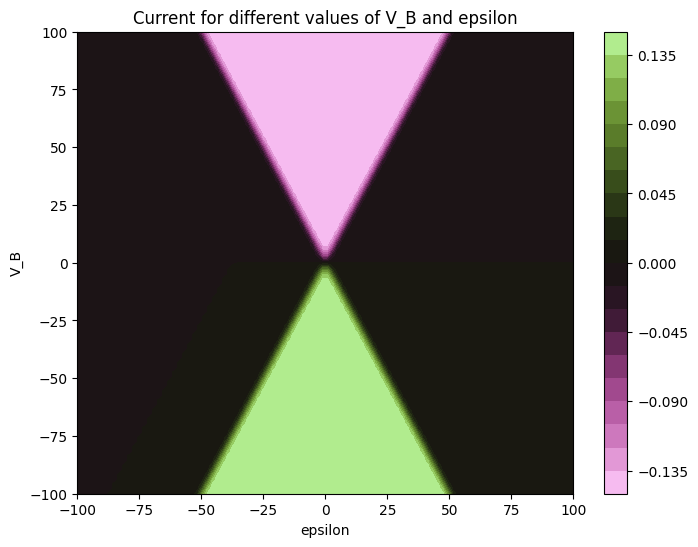

In [3]:
# Current for different values of V_B and epsilon

epsilon_vals = np.linspace(-100, 100, 100)  # Adjust the range and number of points as needed
V_B_vals = np.linspace(-100, 100, 100)

# Create a mesh grid
epsilon, V_B = np.meshgrid(epsilon_vals, V_B_vals)

#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 1
T_R = T_L

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I = calculate_current(**INPUT)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, V_B, I, 20, cmap='vanimo')  # Adjust number of contour levels as needed
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('V_B')
plt.title('Current for different values of V_B and epsilon')
plt.show()

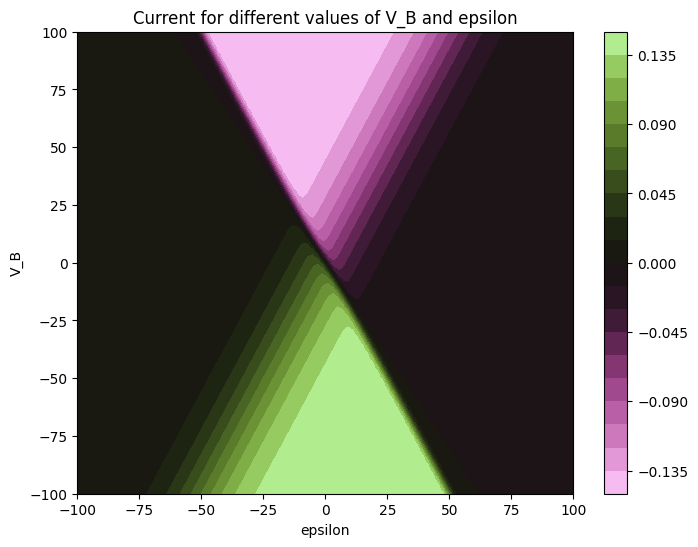

In [ ]:
#Current for different V_B/epsilon with different T_L and T_R
#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 1
T_R = 10

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I = calculate_current(**INPUT)

plt.figure(figsize=(8, 6))
contour = plt.contourf(epsilon, V_B, I, 20, cmap='vanimo')  # Adjust number of contour levels as needed

plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('V_B')
plt.title('Current for different values of V_B and epsilon')
plt.show()

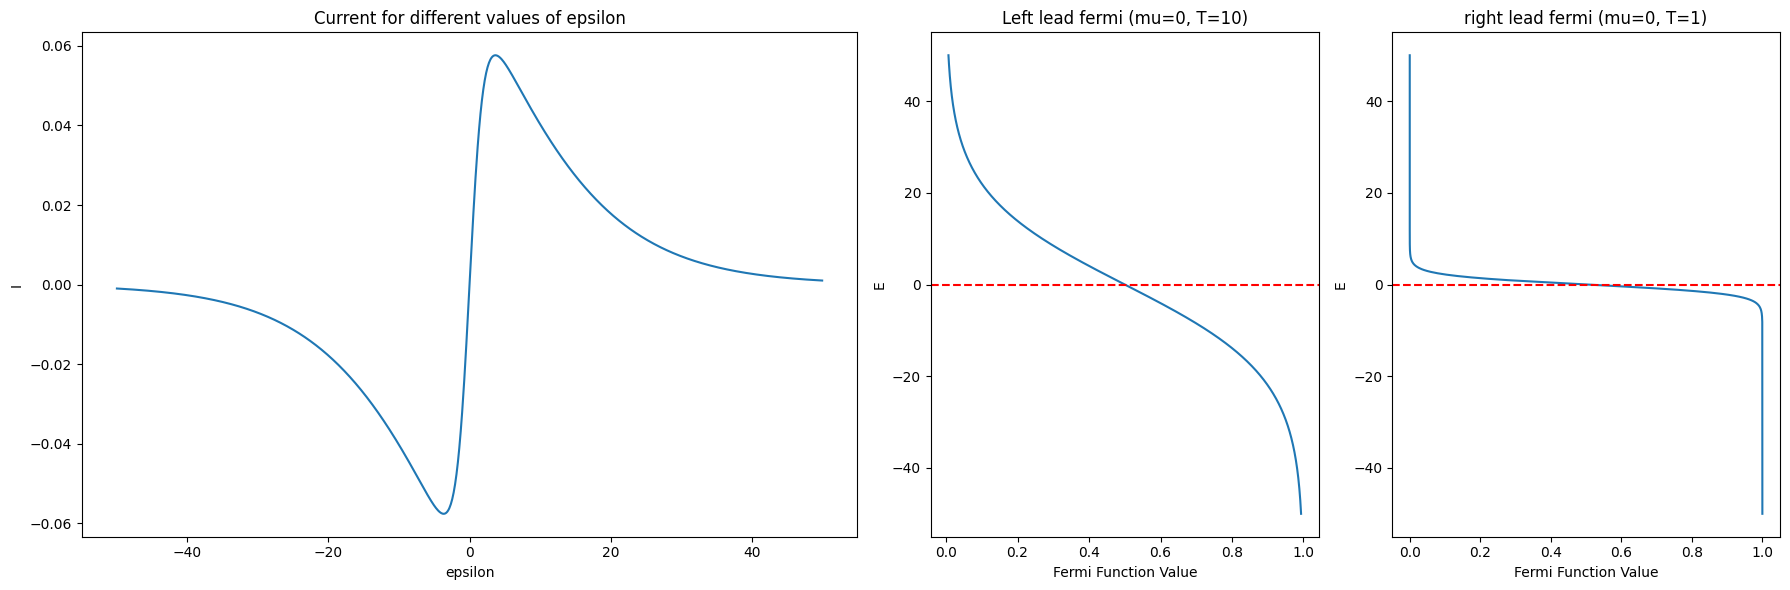

In [5]:
# CALCULATE CURRENT FOR DIFFERENT EPSILON; VB = 0

epsilon = np.linspace(-50,50,1000)
V_B = 0

#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 10
T_R = 1

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I = calculate_current(**INPUT)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1, 1]}) 


ax1.plot(epsilon, I)
ax1.set_xlabel('epsilon')
ax1.set_ylabel('I')
ax1.set_title('Current for different values of epsilon')

mu = 0

# Second plot - Fermi function in Left lead
fermi_L = fermi(mu, epsilon, T_L)
ax2.plot(fermi_L, epsilon)
ax2.axhline(y=mu, color='r', linestyle='--', label=f'μ = {mu}') 
ax2.set_xlabel('Fermi Function Value')
ax2.set_ylabel('E')
ax2.set_title(f'Left lead fermi (mu={mu}, T={T_L})')

# Third plot - Fermi function in right lead
fermi_R = fermi(mu, epsilon, T_R)
ax3.plot(fermi_R, epsilon)
ax3.axhline(y=mu, color='r', linestyle='--', label=f'μ = {mu}')
ax3.set_xlabel('Fermi Function Value')
ax3.set_ylabel('E')
ax3.set_title(f'right lead fermi (mu={mu}, T={T_R})')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

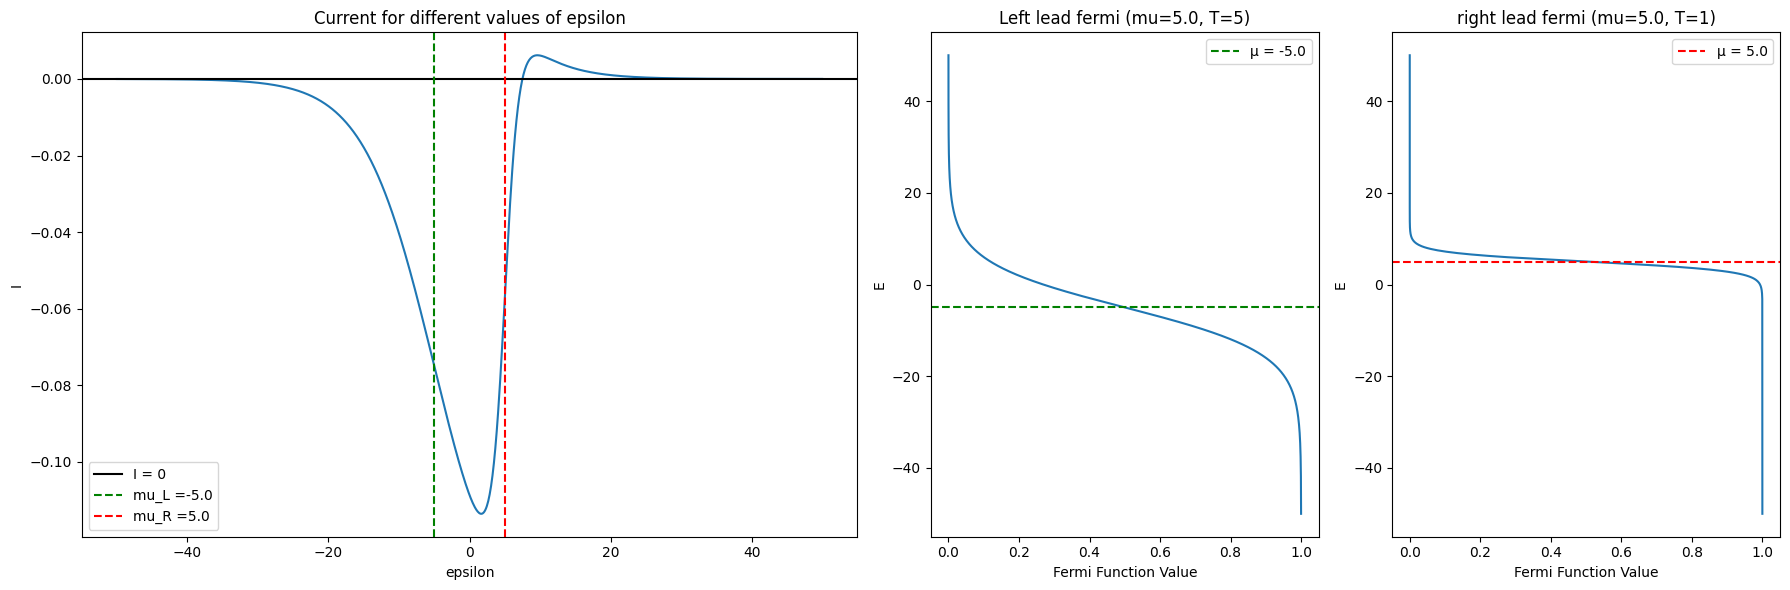

In [6]:
# CALCULATE CURRENT FOR DIFFERENT EPSILON; VB = 10

epsilon = np.linspace(-50,50,1000)
V_B = 10

mu_L = -V_B/2       #for plotting!
mu_R = V_B/2        #for plotting!

#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 5
T_R = 1

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I = calculate_current(**INPUT)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1, 1]}) 


ax1.plot(epsilon, I)
ax1.axhline(y=0, color='black', linestyle='-', label='I = 0')
ax1.axvline(x=mu_L, color='g', linestyle='--', label=f'mu_L ={mu_L}')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('I')
ax1.set_title('Current for different values of epsilon')
ax1.legend()

# Second plot - Fermi function in Left lead
fermi_L = fermi(mu_L, epsilon, T_L)
ax2.plot(fermi_L, epsilon)
ax2.axhline(y=mu_L, color='g', linestyle='--', label=f'μ = {mu_L}') 
ax2.set_xlabel('Fermi Function Value')
ax2.set_ylabel('E')
ax2.set_title(f'Left lead fermi (mu={mu_R}, T={T_L})')
ax2.legend()

# Third plot - Fermi function in right lead
fermi_R = fermi(mu_R, epsilon, T_R)
ax3.plot(fermi_R, epsilon)
ax3.axhline(y=mu_R, color='r', linestyle='--', label=f'μ = {mu_R}')
ax3.set_xlabel('Fermi Function Value')
ax3.set_ylabel('E')
ax3.set_title(f'right lead fermi (mu={mu_R}, T={T_R})')
ax3.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

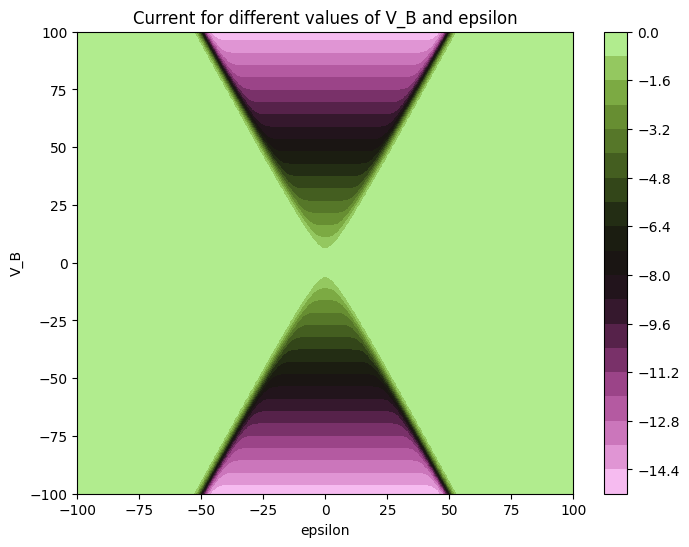

In [7]:
# PLOT OF THE OUTPUT POWER

epsilon_vals = np.linspace(-100, 100, 100)  # Adjust the range and number of points as needed
V_B_vals = np.linspace(-100, 100, 100)

# Create a mesh grid
epsilon, V_B = np.meshgrid(epsilon_vals, V_B_vals)

#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 1
T_R = T_L

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------


I = calculate_current(**INPUT)

plt.figure(figsize=(8, 6))
# Create a contour plot (or a pcolormesh plot for a smooth color gradient)
contour = plt.contourf(epsilon, V_B, I*V_B, 20, cmap='vanimo')  # Adjust number of contour levels as needed
plt.colorbar(contour)
plt.xlabel('epsilon')
plt.ylabel('V_B')
plt.title('Current for different values of V_B and epsilon')

# Show the plot
plt.show()

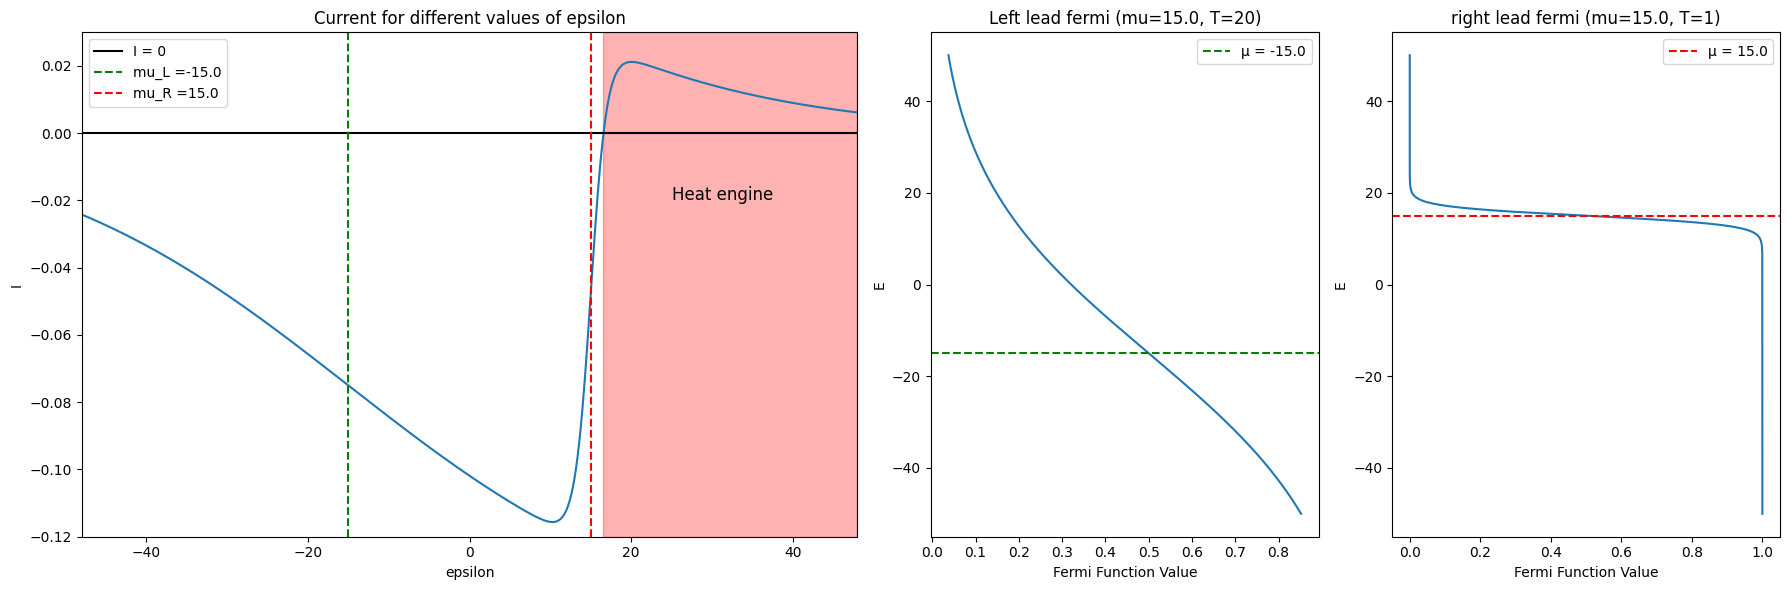

In [8]:
# HEAT ENGINE VB = 30

epsilon = np.linspace(-50,50,1000)
V_B = 30

mu_L = -V_B/2       #for plotting!
mu_R = V_B/2        #for plotting!

#--SETUP: ---------------------------------------------------------------------------------
gamma_L = 0.3
gamma_R = gamma_L
T_L = 20
T_R = 1

INPUT = {'epsilon': epsilon,         
            'V_B': V_B,
            'gamma_L': gamma_L,                   # gamma in left lead
            'gamma_R': gamma_R,                 # gamma in right lead
            'T_L': T_L,          # Temperature in left lead
            'T_R': T_R}                    # Temperature in right lead
#------------------------------------------------------------------------------------------

I = calculate_current(**INPUT)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [2, 1, 1]}) 


y_lower, y_upper = -0.12, 0.03
x_lower, x_upper = -48, 48
ax1.plot(epsilon, I)
ax1.set_ylim(y_lower, y_upper)
ax1.set_xlim(x_lower, x_upper)
ax1.fill_between(epsilon, y_lower, y_upper, where=(epsilon >= 16.5) & (epsilon <= x_upper), color='red', alpha=0.3)
ax1.annotate('Heat engine', 
             xy=(25, -0.02),  # Position of the annotation
             xytext=(25, -0.02),  # Position of the text
             fontsize=12, color='black')  # Text customization
ax1.axhline(y=0, color='black', linestyle='-', label='I = 0')
ax1.axvline(x=mu_L, color='g', linestyle='--', label=f'mu_L ={mu_L}')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('I')
ax1.set_title('Current for different values of epsilon')
ax1.legend()

# Second plot - Fermi function in Left lead
fermi_L = fermi(mu_L, epsilon, T_L)
ax2.plot(fermi_L, epsilon)
ax2.axhline(y=mu_L, color='g', linestyle='--', label=f'μ = {mu_L}') 
ax2.set_xlabel('Fermi Function Value')
ax2.set_ylabel('E')
ax2.set_title(f'Left lead fermi (mu={mu_R}, T={T_L})')
ax2.legend()

# Third plot - Fermi function in right lead
fermi_R = fermi(mu_R, epsilon, T_R)
ax3.plot(fermi_R, epsilon)
ax3.axhline(y=mu_R, color='r', linestyle='--', label=f'μ = {mu_R}')
ax3.set_xlabel('Fermi Function Value')
ax3.set_ylabel('E')
ax3.set_title(f'right lead fermi (mu={mu_R}, T={T_R})')
ax3.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()